# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/home/workspace/dog_project/data/lfw/*/*"))
dog_files = np.array(glob("/home/workspace/dog_project/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


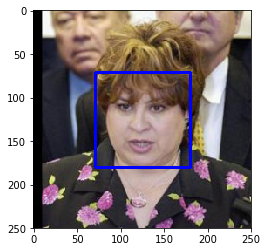

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()


Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0


### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
100% for humans, 13.3% for dogs.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_yes = 0
human_no = 0
dog_yes = 0
dog_no = 0

for i in range(len(human_files_short)):
    if face_detector(human_files_short[i]) == True:
        human_yes = human_yes + 1
    else:
        human_no = human_no + 1
    
if (human_yes + human_no) == len(human_files_short):
    human_ratio = (human_yes / len(human_files_short)) * 100
    print('The ratio of correct predictions of a human face is:', human_ratio, '%')
else:
    print('Something went terribly wrong with the math calculating the ratio of correct human faces.')

for i in range(len(dog_files_short)):
    if face_detector(dog_files_short[i]) == True:
        dog_yes = dog_yes + 1
    else:
        dog_no = dog_no + 1
    
if (dog_yes + dog_no) == len(dog_files_short):
    dog_ratio = (dog_yes / len(dog_files_short)) * 100
    print('The ratio of correct predictions of a human face when it was actuall a dog is:', dog_ratio, '%')
else:
    print('Something went terribly wrong with the math calculating the ratio of human faces with dog pictures inserted.')


The ratio of correct predictions of a human face is: 99.0 %
The ratio of correct predictions of a human face when it was actuall a dog is: 10.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [32]:
import torch
import torchvision
from torchvision import models, datasets

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
device = "cpu"

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    device = "cuda"
    VGG16 = VGG16.cuda()
    

In [33]:
VGG16.to(device)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [34]:
%matplotlib inline
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torch.autograd import Variable
from torchvision import datasets, models, transforms
from matplotlib.pyplot import imshow


def load_image(img_path):
    # Pull in the image that we want to inspect
    try:
        fresh_image = Image.open(img_path).convert('RGB')
    
    except IOError:
        pass
    
    # Prepare the image data
    transform = transforms.Compose([
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])
                                  ])
                                    
    image_tensor = transform(fresh_image)[:3, :, :].unsqueeze(0)
    
    # Pytorch models expect inputs to be Variables.  A Pytorch Variable is a wrapper around a Pytorch Tensor.
    image_var = Variable(image_tensor)

    return image_var


def VGG16_predict(img_path):
    ## TODO: Complete the function.
    
    # load the image and transform it
    image_var = load_image(img_path).to(device)    
    
    # The next line returns the models output in the form of a Tensor of shape (batch, num class labels)
    predictions = VGG16(image_var)
    
    # The next line returns the index of the class label with the largets value
    prediction_index = predictions.cpu().data.numpy().argmax()
    
    # The next line converts the index to a string using our labels dict ### N/A for this exercise
    #print(labels[prediction])
    
    ## Return the *index* of the predicted class for that image
    index = prediction_index
    
    return index # predicted class index


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [37]:
### returns "True" if a dog is detected in the image stored at img_path
#def dog_detector(img_path):
    ## TODO: Complete the function.
img_path = '/home/workspace/dog_project/data/dog_images/valid/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07336.jpg'

index = VGG16_predict(img_path)

print(index)

if (index >= 151) & (index <= 268):
    print('True')
    #return True
else:
    print('False')
    #return False
    

168
True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [38]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

def pic_detector(img_path):
    index = VGG16_predict(img_path)

    #print(index)

    if (index >= 151) & (index <= 268):
        return True
        #return True
    else:
        return False
        #return False
    
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_yes = 0
human_no = 0
dog_yes = 0
dog_no = 0

for i in range(len(human_files_short)):
    if pic_detector(human_files_short[i]) == True:
        human_yes = human_yes + 1
    else:
        human_no = human_no + 1
    
if (human_yes + human_no) == len(human_files_short):
    human_ratio = (human_yes / len(human_files_short)) * 100
    print('The ratio of predictions for a human face is:', human_ratio, '%')
else:
    print('Something went terribly wrong with the math calculating the ratio of predicted human faces.')

for i in range(len(dog_files_short)):
    if pic_detector(dog_files_short[i]) == True:
        dog_yes = dog_yes + 1
    else:
        dog_no = dog_no + 1
    
if (dog_yes + dog_no) == len(dog_files_short):
    dog_ratio = (dog_yes / len(dog_files_short)) * 100
    print('The ratio of predictions for a dog is:', dog_ratio, '%')
else:
    print('Something went terribly wrong with the math calculating the ratio of predicted dogs.')


The ratio of predictions for a human face is: 2.0 %
The ratio of predictions for a dog is: 97.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

256
CUDA is available.  Training on GPU ...


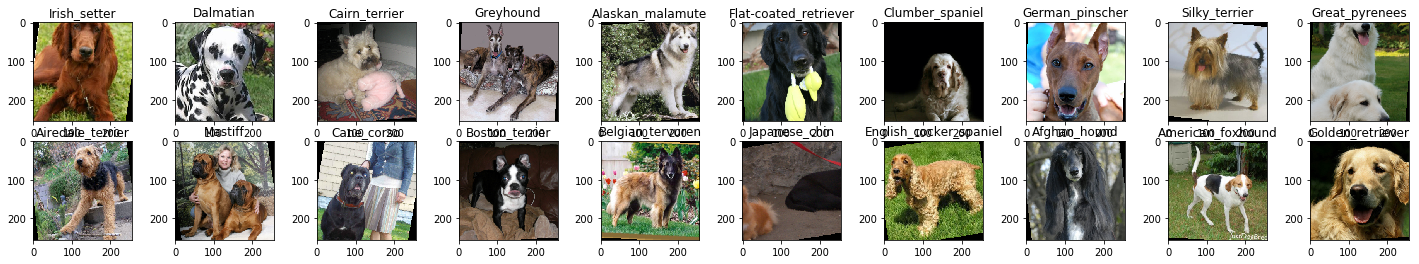

In [39]:
%matplotlib inline
import torch
import os
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile
from torchvision import datasets
from matplotlib.pyplot import imshow
from matplotlib.pyplot import figure

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

pic_size = 256  # This is the value I settled on for step 3.
print(pic_size)

def load(pic_size):
    ImageFile.LOAD_TRUNCATED_IMAGES = True

    use_cuda = torch.cuda.is_available()
    if not use_cuda:
        print('CUDA is not available.  Training on CPU ...')
    else:
        print('CUDA is available.  Training on GPU ...')

    classes = []
    for root, dirs, files in os.walk('./data/dog_images/test/'):
        for name in dirs:
            classes.append(name)
        
    classes.sort()                               # Sort the list based on the numbers at the beginning of the class name.
    classes = [(str(i)[4:]) for i in classes]    # Go ahead and strip the number off of the front of the class name.
    #print(len(classes))                         # I expect this to be 133 ... and it is
    
    data_dir = '/home/workspace/dog_project/data/dog_images/'
    
    test_dir = os.path.join(data_dir, 'test/')
    #test_dir = data_dir + 'test/'               # Another way of doing this
    train_dir = os.path.join(data_dir, 'train/')
    valid_dir = os.path.join(data_dir, 'valid/')

    data_transform = transforms.Compose([
                                        transforms.Resize(pic_size),
                                        transforms.RandomRotation(10, resample=False, expand=True, center=None),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.CenterCrop(pic_size),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.485, 0.456, 0.406),
                                                             (0.229, 0.224, 0.225))
                                        ])

    test_data = datasets.ImageFolder(test_dir, transform=data_transform)
    train_data = datasets.ImageFolder(train_dir, transform=data_transform)
    valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)

    # The number of sub-processes to use for data loading
    num_workers = 0
    # How many samples per batch to load
    batch_size = 20

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

    loaders_scratch = {"train": train_loader,
                       "valid": valid_loader,
                       "test": test_loader}
    
    return loaders_scratch, classes

loaders_scratch, classes = load(pic_size)
loaders_scratch = loaders_scratch
classes = classes

dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()
images = images.numpy()
                                   
fig = plt.figure(figsize=(25, 4))               # width x height in INCHES
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1)          # this adds more than one plot to a figure
                                                # (#rows, #columns, index of subplot)
    image = images[idx].transpose((1, 2, 0))    # transpose, or rotate/flip, the image
    mean = np.array([0.485, 0.456, 0.406])      # create an array for a mean
    std = np.array([0.229, 0.224, 0.225])       # create an array for a std
    image = std * image + mean                  # undo the normalization that was done with the transfer function
    image = np.clip(image, 0, 1)                # make sure everthing is between zero and one
    ax.imshow(image)                            # show the image
    ax.set_title(classes[labels[idx]])          # put the class labels with the images
    

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
* I resize the images by forcing them to a square size via "Resize", juggling the image around, and then finally cropping to my final image size.
* I initally started with a size that was the average size of all the images (548 x 548).  But I kepted running out of memory.  I reduced the size as low as (64 x 64), but my model wouldn't train on that (guessing too little information).  I slowly increased the size of the image until I found a number where I could train at a decent rate AND actually show training progress.  That number was similar to what I found others had success with (224 x 224).
* I did decide to augment the dataset.  I randomly rotated by 30 degrees, and did a random flip.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [40]:
#import torch
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv10 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.conv11 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(2, 2) 
        
        self.fc1 = nn.Linear(64 * 32 * 32, 4256)
        self.fc2 = nn.Linear(4256, 133)
        self.dropout = nn.Dropout(0.25)
        self.batch_norm = nn.BatchNorm1d(num_features=4256)
        
        
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.conv10(x))
        x = self.maxpool(x)
        x = self.dropout(x)
                
        x = F.relu(self.conv11(x))
        x = self.maxpool(x)
        x = self.dropout(x)
        
        x = F.relu(self.conv12(x))
        x = self.maxpool(x)
        x = self.dropout(x)
        
        x = x.view(-1, 64 * 32 * 32)  # Flatten
        #x = x.view(x.size(0), -1)
        
        x = F.relu(self.batch_norm(self.fc1(x)))     
        x = self.dropout(x)
        x = self.fc2(x)        
                
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
* I started out with a huge model that emulated the VGG16 as best I could (thinking that worked fairly good before, so it should work great now).  But, I kepted running out of memory.  So I started whittling my model down, bit by bit.  It was a trade-off between image pixel size, and the number of MaxPool layers with a focus memory usage.  I never could get it to train though.  So, I did more on-line research and found a model architecture that seemed to work well on a similar problem.  The new model was WAY smaller, and actually trained.  

* So, in the future I will go about things differently.  Instead of creating a HUGE model and trim it down, I will try to make a minimalist model and add to it until; #1 it starts working and, #2 I get the precision that I'm looking for.  This has been a hard earned lesson.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [41]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [34]:
from datetime import datetime

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data) 
            loss = criterion(output, target)
            loss.backward()
            optimizer.step() 
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))           
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # print a time stamp to help me figure out what's going on during training
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time = ", current_time)
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ... \n'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')  # save the model because validation loss has decreased
            valid_loss_min = valid_loss
    
    # return trained model
    return model

num_epochs = 30

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


Epoch: 1 	Training Loss: 4.656241 	Validation Loss: 4.822721
Current Time =  22:17:21
Validation loss decreased (inf --> 4.822721).  Saving model ... 

Epoch: 2 	Training Loss: 4.287549 	Validation Loss: 4.884094
Current Time =  22:19:03
Epoch: 3 	Training Loss: 4.091867 	Validation Loss: 4.812404
Current Time =  22:20:43
Validation loss decreased (4.822721 --> 4.812404).  Saving model ... 

Epoch: 4 	Training Loss: 3.929581 	Validation Loss: 4.585627
Current Time =  22:22:26
Validation loss decreased (4.812404 --> 4.585627).  Saving model ... 

Epoch: 5 	Training Loss: 3.792358 	Validation Loss: 4.655221
Current Time =  22:24:08
Epoch: 6 	Training Loss: 3.680254 	Validation Loss: 4.605029
Current Time =  22:25:48
Epoch: 7 	Training Loss: 3.549642 	Validation Loss: 4.295197
Current Time =  22:27:28
Validation loss decreased (4.585627 --> 4.295197).  Saving model ... 

Epoch: 8 	Training Loss: 3.438384 	Validation Loss: 4.338450
Current Time =  22:29:10
Epoch: 9 	Training Loss: 3.353416

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [35]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)


Test Loss: 3.902116


Test Accuracy: 15% (129/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
############################################################################################################################

In [42]:
## TODO: Specify data loaders
pic_size = 224
loaders_scratch, classes = load(pic_size)
loaders_scratch = loaders_scratch
classes = classes

loaders_transfer = loaders_scratch
print(loaders_transfer)


CUDA is available.  Training on GPU ...
{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f0f1e208a58>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f0f1e2256a0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f0f1e264710>}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [43]:
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
model_transfer = models.vgg16(pretrained = True)

use_cuda = torch.cuda.is_available()

i = 6
inputs = model_transfer.classifier[i].in_features
outputs = model_transfer.classifier[i].out_features
new_outputs = 133
new_inputs = 4096


############################################################################################################################
#
#  We need to freeze the model parameters so that we don't back propagate through them and mess up the model
#
############################################################################################################################

for param in model_transfer.parameters():
    param.requires_grad = False
    
############################################################################################################################
#
#  To keep things simple, I'm going to take the last linear layer of VGG16 and make its output equal 133,
#  so we match our 133 dog classes
#
############################################################################################################################

last_layer = nn.Linear(new_inputs, new_outputs)
model_transfer.classifier[i] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()
    
#print(model_transfer)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
i chose the VGG16 model because it seemed to work really good in the past on other images.

I needed to change the final layer at the end of the VGG16 model that would take the output of VGG16 (1000 classes) and bring the new model's output to 133 classes (the number of dog breeds I'm investigating).  But before I did that, I needed to freeze the rest of the model so that while training the newly added last connected layer I don't back-propagate into the rest of the model and mess up its weights.

Then, if/when CUDA is available I transfer the model over to it.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [44]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier[i].parameters(), lr=0.001)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [45]:
from datetime import datetime

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data) 
            loss = criterion(output, target)
            loss.backward()
            optimizer.step() 
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))           
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
                                                                                    epoch, 
                                                                                    train_loss,
                                                                                    valid_loss
                                                                                    ))
        
        # print a time stamp to help me figure out what's going on during training
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time = ", current_time)
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ... \n'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')  # save the model because validation loss has decreased
            valid_loss_min = valid_loss
    
    # return trained model
    return model


In [ ]:
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

num_epochs = 30

# train the model
model_transfer = train(num_epochs, loaders_transfer, model_transfer, 
                       optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [33]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [34]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


Test Loss: 2.042607


Test Accuracy: 69% (585/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [46]:
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture
model_transfer = models.vgg16(pretrained = True)

use_cuda = torch.cuda.is_available()

i = 6
new_outputs = 133
new_inputs = 4096


############################################################################################################################
#
#  We need to freeze the model parameters so that we don't back propagate through them and mess up the model
#
############################################################################################################################

for param in model_transfer.parameters():
    param.requires_grad = False
    
############################################################################################################################
#
#  To keep things simple, I'm going to take the last linear layer of VGG16 and make its output equal 133,
#  so we match our 133 dog classes
#
############################################################################################################################

last_layer = nn.Linear(new_inputs, new_outputs)
model_transfer.classifier[i] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()
    
#print(model_transfer)


In [47]:
import os

def classes():    
    classes = []
    for root, dirs, files in os.walk('./data/dog_images/test/'):
        for name in dirs:
            classes.append(name)
        
    classes.sort()                               # Sort the list based on the numbers at the beginning of the class name.
    classes = [(str(i)[4:]) for i in classes]    # Go ahead and strip the number off of the front of the class name.
    #print(len(classes))                         # I expect this to be 133 ... and it is
    
    return classes


In [48]:
#import torchvision
#from torchvision import datasets, models, transforms
#from matplotlib.pyplot import imshow
from PIL import Image

def image_to_tensor(img_path):
    
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                               std=[0.229, 0.224, 0.225])])
    image_tensor = transformations(img)[:3,:,:].unsqueeze(0)
    return image_tensor


In [50]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

import torch
import torchvision.models as models
import torch.nn as nn
import numpy as np

use_cuda = torch.cuda.is_available()

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in loaders_scratch['train'].classes]
class_names = classes()

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = image_to_tensor(img_path)
    
    if use_cuda:
        image_tensor = image_tensor.cuda()
        
    output = model_transfer(image_tensor)
    _, prediction_tensor = torch.max(output, 1)
    
    if use_cuda:
        prediction = np.squeeze(prediction_tensor.cpu().numpy())
    else:
        prediction = np.squeeze(prediction_tensor.numpy())
        
    breed = class_names[prediction]
    
    return breed

img_path = '/home/workspace/dog_project/data/dog_images/test/034.Boxer/Boxer_02413.jpg'  # A test case

breed = predict_breed_transfer(img_path)

print(breed)


Entlebucher_mountain_dog


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [51]:
VGG16 = models.vgg16(pretrained=True)
device = "cpu"

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    device = "cuda"
    VGG16 = VGG16.cuda()

def VGG16_predict(img_path):
    ## TODO: Complete the function.
    
    # load the image and transform it
    image_var = image_to_tensor(img_path).to(device)    
    
    # The next line returns the models output in the form of a Tensor of shape (batch, num class labels)
    predictions = VGG16(image_var)
    
    # The next line returns the index of the class label with the largets value
    prediction_index = predictions.cpu().data.numpy().argmax()
    
    # The next line converts the index to a string using our labels dict ### N/A for this exercise
    #print(labels[prediction])
    
    ## Return the *index* of the predicted class for that image
    index = prediction_index
    
    return index # predicted class index


In [52]:
def dog_detector(img_path):
    
    index = VGG16_predict(img_path)

    if (index >= 151) & (index <= 268):
        return True, index
        #return True
    else:
        return False
        #return False
        

In [53]:
# returns "True" if face is detected in image stored at img_path
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def human_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0


In [54]:
def show_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()
    


The image seems to be of a human.


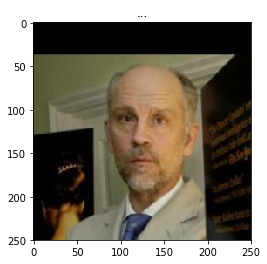

In [55]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    is_dog = dog_detector(img_path)
    is_human = human_detector(img_path)
    
    if is_dog:
        dog_breed = predict_breed_transfer(img_path)
        print('\nThe image seems to be of a dog.')
        return dog_breed
        
    elif is_human:
        human_breed = predict_breed_transfer(img_path)
        print('\nThe image seems to be of a human.')
        return human_breed
        
    else:
        print('\nThe image offered is niether an human or a dog.')
        return 'error'

img_path = '/home/workspace/dog_project/data/lfw/John_Malkovich/John_Malkovich_0003.jpg'  # result = Pharaoh_hound
#img_path = '/home/workspace/dog_project/data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg'  # result = Alaskan_malamute
#img_path = '/home/workspace/dog_project/data/lfw/Yoshiyuki_Kamei/Yoshiyuki_Kamei_0001.jpg'  # result = Plott

what_is_it = run_app(img_path)

#print(what_is_it)

show_image(img_path, title='...')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
The output is what I expect when I exploit known good models.  Getting my model made from scratch to work took DAYS and didn't give me the kind of results that I wanted or expected.

1. I wouldn't use my model made from scratch.  I'd invoke the modified VGG16 model, or even better try other known models.
2. I'd like to increase my Workspace memory so that I can try bigger and bigger models (or at least higher resolution images).
3. I could spend more time tweaking the variables in my models to try and get better prediciton accuracy.

In [56]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/home/workspace/dog_project/data/lfw/*/*"))
dog_files = np.array(glob("/home/workspace/dog_project/data/dog_images/*/*/*"))

#print(dog_files[:3])



The image seems to be of a human.


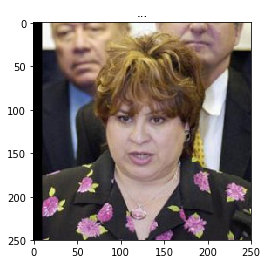

Bernese_mountain_dog

The image seems to be of a human.


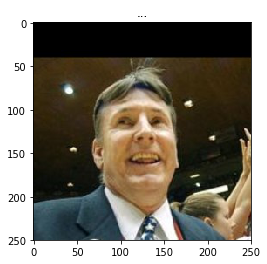

Italian_greyhound

The image seems to be of a human.


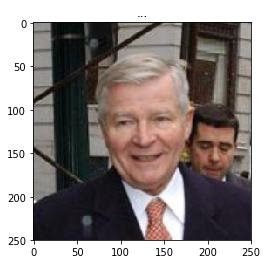

Miniature_schnauzer

The image seems to be of a dog.


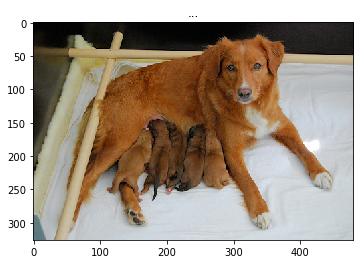

Australian_shepherd

The image seems to be of a dog.


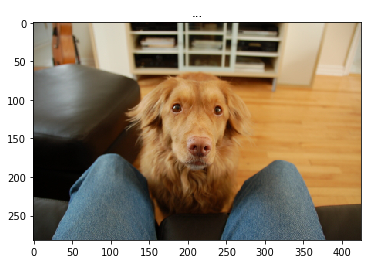

Clumber_spaniel

The image seems to be of a dog.


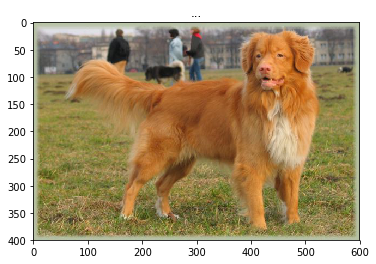

Clumber_spaniel


In [57]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for img_path in np.hstack((human_files[:3], dog_files[:3])):
    what_is_it = run_app(img_path)
    show_image(img_path, title='...')
    print(what_is_it)
    